# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#https://pypi.python.org/pypi/citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Where do you request the API key? Which Weather API in particular will you need? 
#What URL endpoints does it expect? What JSON structure does it respond with?
#Are you getting coverage of the full gamut of latitudes and longitudes? 
#Or are you simply choosing 500 cities concentrated in one region of the world?

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
from api_keys import api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = ["metric", "imperial"]
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
#humidity = []
#max_temp = []
#wind_speed = []
#lat = []
#lon = []
#cloudiness = []
#country = []
#date = []
#valid_cities = []
city_data = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        #valid_cities.append(city)
        #time.sleep(1)
        lat = response['coord']['lat']
        lon=response['coord']['lon']
        humidity=response['main']['humidity']
        max_temp=response['main']['temp_max']
        wind_speed=response['wind']['speed']
        cloudiness=response['clouds']['all']
        country=response['sys']['country']
        date=response['dt']
        city_data.append({"City": city,"Cloudiness":cloudiness, "Country":country,"Date":date,"Humidity":humidity, "Lat": lat, "Lng": lon,  "Max Temp":max_temp, "Wind Speed":wind_speed})
        print(f'{response["name"]} {response["id"]}')
    except:
        print(f'city not found')
        pass      

May Pen 3489523
Puerto Ayora 3652764
Port Elizabeth 4501427
city not found
city not found
Butaritari 2110227
Hobart 2163355
New Norfolk 2155415
Port Alfred 964432
Lebu 344979
Petatlan 3992842
Manzhouli 2035836
Fairbanks 5861897
Mataura 6201424
Pevek 2122090
Chicama 3698359
Sitka 4267710
Kokopo 2093685
Ostrovnoy 556268
San Patricio 3437029
Jamestown 2069194
East London 1006984
Khasan 2039557
Punta Arenas 3874787
Kupino 1501365
Klaksvik 2618795
city not found
Lorengau 2092164
Puerto Leguizamo 3671437
Dikson 1507390
Avarua 4035715
city not found
Saint-Philippe 6138908
Soria 3108681
Chongwe 917688
city not found
Belaya Gora 2126785
Luderitz 3355672
Bredasdorp 1015776
Hermanus 3366880
Evensk 2125693
Bambous Virieux 1106677
Ensenada 4006702
Albany 5106834
Lagoa 2267254
Puerto Baquerizo Moreno 3652758
Cape Town 3369157
Burnie 2173125
Aklavik 5882953
Bang Saphan 1157662
Poum 787487
Luxor 360502
Dingle 1714733
Thompson 6165406
Bluff 2175403
Ushuaia 3833367
Votkinsk 471430
Kapaa 5848280
Umm Kadd

Pattukkottai 1260040
Neiafu 4032420
Saint Anthony 5606187
Iaciara 3461641
College 5859699
Pacifica 5380420
Buenos Aires 3435910
Chapais 5919850
Anton Lizardo 3532821
Shawnee 4551177
city not found
San Matias 3444105
Puerto Escondido 3520994
Robertsport 2274275
Zhezkazgan 1516589
Port-Cartier 6111696
Shahr-e Babak 115781
Sant Feliu de Guixols 3110643
city not found
Marystown 6067472
Buzovna 586925
city not found
Synya 485215
Kedougou 2250645
Cassia 4153146
Bua Yai 1611492
Itaituba 3397967
Vila 3164565
Zelezna Ruda 3061567
Avera 4231997
Petropavlovsk-Kamchatskiy 2122104
Arman 2127060
Ondo 2326171
city not found
Omsukchan 2122493
city not found
Talara 3691582
Isla Mujeres 3526756
Mahibadhoo 1337605
Cockburn Town 3576994
Zabid 69559
Terrace Bay 6162951
Altus 4529292
Kushiro 2129072
Fukue 1848373
Padang 1633419
Tyrma 2014694
city not found
Muravlenko 1540711
Chara 262462
Cururupu 3401148
Seguela 2596934
Makrana 1264206
Udachnyy 2014624
Chimore 3920736
city not found
Laurel 4360369
Trairi 33

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#weather_dict = {"City": valid_cities,"Cloudiness":cloudiness, "Country":country,"Date":date,"Humidity":humidity, "Lat": lat, "Lng": lon,  "Max Temp":max_temp, "Wind Speed":wind_speed}
weather_data = pd.DataFrame(city_data)


In [7]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,may pen,20,JM,1573034201,69,17.97,-77.26,299.15,1.00
1,puerto ayora,44,EC,1573034025,93,-0.74,-90.35,293.15,2.68
2,port elizabeth,1,US,1573034202,70,39.31,-74.98,283.15,1.50
3,butaritari,100,KI,1573034202,77,3.07,172.79,301.77,5.06
4,hobart,75,AU,1573033963,76,-42.88,147.33,282.15,6.20


In [11]:
weather_data.to_csv('WeatherIPYNB.csv', sep='\t', encoding='utf-8')
weather_data.to_html('WeatherIPYNB.html')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

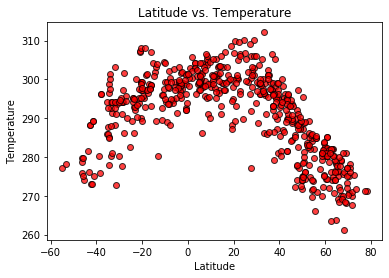

In [9]:
latitude = weather_data["Lat"]
temperature = weather_data["Max Temp"]
plt.scatter(latitude, temperature, label="cities", facecolors="red", edgecolors="black", alpha=0.75)
#plt.ylim(0, 1)
plt.xlabel("Latitude")
plt.ylabel("Temperature")   
plt.title("Latitude vs. Temperature")
plt.savefig("../Lat_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

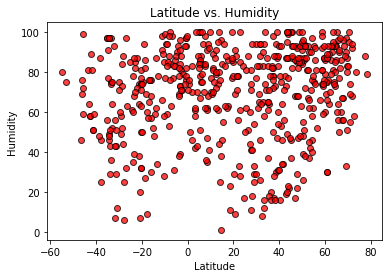

In [10]:
latitude = weather_data["Lat"]
humid = weather_data["Humidity"]
plt.scatter(latitude, humid, label="cities", facecolors="red", edgecolors="black", alpha=0.75)
#plt.ylim(0, 1)
plt.xlabel("Latitude")
plt.ylabel("Humidity")   
plt.title("Latitude vs. Humidity")
plt.savefig("../Lat_Humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

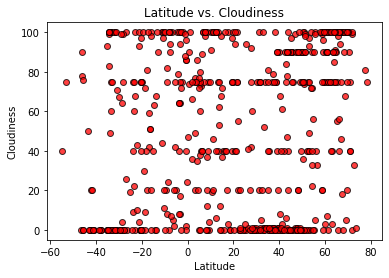

In [11]:
latitude = weather_data["Lat"]
cloud = weather_data["Cloudiness"]
plt.scatter(latitude, cloud, label="cities", facecolors="red", edgecolors="black", alpha=0.75)
#plt.ylim(0, 1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")   
plt.title("Latitude vs. Cloudiness")
plt.savefig("../Lat_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

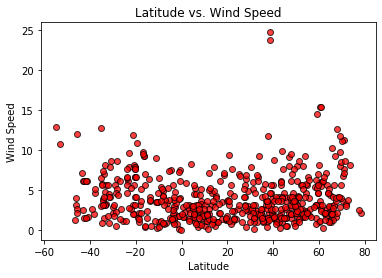

In [12]:
latitude = weather_data["Lat"]
wind = weather_data["Wind Speed"]
plt.scatter(latitude, wind, label="cities", facecolors="red", edgecolors="black", alpha=0.75)
#plt.ylim(0, 1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")   
plt.title("Latitude vs. Wind Speed")
plt.savefig("../Lat_Wind.png")
plt.show()